## **Praktikum Pengolahan Sinyal Digital**



---


* Nama: Rifko Satrio Rahmadani
* NIM: 231344057
* Kelas: 2B-TNK


#Modul 4 - Superposisi Sinyal dan Sinyal Acak

## Pendahuluan
Pada sistem riil sinyal-sinyal yang sesungguhnya akan bercampur dengan noise atau derau. Fungsi dari pemrosesan sinyal ialah untuk mengambil komponen sinyal yang dibutuhkan dari sinyal yang bercampur dengan derau. Dalam praktikum ini akan dilakukan pembuatan sinyal dengan tambahan derau.

## Dependency yang dibutuhkan

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import signal as sgn
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def set_ticks_array(minVal,maxVal,incVal):
    ticks_array=np.linspace(minVal,maxVal, int((maxVal-minVal)/incVal+1),endpoint=True)
    return ticks_array

## Kilas Balik Sinyal Sinusoidal

In [ ]:
frekuensi=1
frekuensi_sampling=100
fasa_awal=0
A=1
B=0
T_start=0
dur=1
t = np.linspace(T_start,dur,frekuensi_sampling)
s = B+A*np.sin(2*np.pi*frekuensi*t+np.deg2rad(fasa_awal))

1. Buat program gelombang sinus diatas menjadi suatu fungsi yang bila mana fungsi tersebut dipanggil maka akan mengembalikan array t (sumbu x) dan array s (sumbu y)

In [ ]:
def generate_sine_wave(frekuensi, frekuensi_sampling, dur, fasa_awal=0, A=1, B=0, T_start=0):
    #sesuaikan program diatas disini
    t = np.linspace(T_start,dur,frekuensi_sampling)
    s = B+A*np.sin(2*np.pi*frekuensi*t+np.deg2rad(fasa_awal))
    return t, s

2. Sebagai tes, Coba jalankan fungsi Anda untuk membuat suatu fungsi sinus dengan frekuensi 3 dan sampling rate 10, plot dengan menggunakan stem, perhatikan apakah sesuai


Jangan lupa untuk plot, untuk membuat program plot seperti biasa (format terlampir dibawah)

```python
plt.plot(t,s)
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
plt.title('Sine Plot')
# plt.xlim(0,0.25)
# plt.ylim(-1.5,1.5)
# plt.yticks(set_ticks_array(-1,1,0.2))
# plt.xticks(set_ticks_array(0,0.25,0.05))
plt.grid()
plt.show()
```



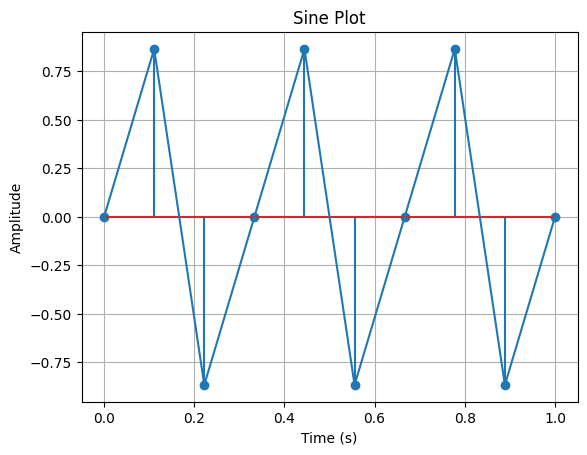

In [ ]:
#tulis program percobaan Anda disini
t,s=generate_sine_wave(3, 10, 1)
plt.stem(t,s)
plt.plot(t, s)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Plot')
# plt.xlim(0,0.25)
# plt.ylim(-1.5,1.5)
# plt.yticks(set_ticks_array(-1,1,0.2))
# plt.xticks(set_ticks_array(0,0.25,0.05))
plt.grid()
plt.show()

3. Coba Anda melakukan superposisi dengan penjumlahan 10 sinyal dengan
 - amplitudo $$ \frac{4} {\pi k} $$
 - frekuensi $$ 2k-1 $$
 di mana $k$ menunjukkan sinyal ke-1, ke-2 ... ke-10

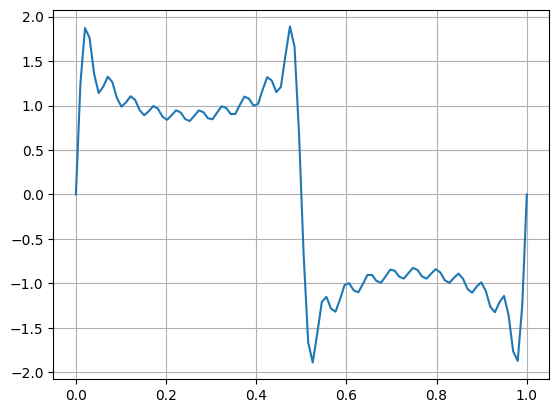

In [ ]:
#tulis program percobaan Anda disini
t1,s1 = generate_sine_wave(1, 100, 1, 0, 4/(3.14*1),0)
t2,s2 = generate_sine_wave(3, 100, 1, 0, 4/(3.14*2),0)
t3,s3 = generate_sine_wave(5, 100, 1, 0, 4/(3.14*3),0)
t4,s4 = generate_sine_wave(7, 100, 1, 0, 4/(3.14*4),0)
t5,s5 = generate_sine_wave(9, 100, 1, 0, 4/(3.14*5),0)
t6,s6 = generate_sine_wave(11, 100, 1, 0, 4/(3.14*6),0)
t7,s7 = generate_sine_wave(13, 100, 1, 0, 4/(3.14*7),0)
t8,s8 = generate_sine_wave(15, 100, 1, 0, 4/(3.14*8),0)
t9,s9 = generate_sine_wave(17, 100, 1, 0, 4/(3.14*9),0)
t10,s10 = generate_sine_wave(19, 100, 1, 0,4/(3.14*10),0)
plt.plot((t1),(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10))
plt.grid()

## Sinyal non periodik

### Sinyal Pulsa

Program fungsi sinyal pulsa

In [ ]:
def generate_impulse_series(a, b, c):

  signal = np.zeros(c)
  for i in range(a):
    signal[i * b] = 1
  return signal


Contoh penggunaan fungsi

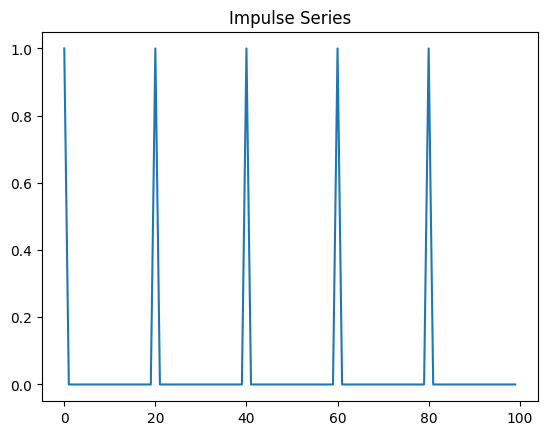

In [ ]:
# Example usage:
a = 5
b = 20
c = 100

impulse_series = generate_impulse_series(a, b, c)

# Plot the impulse series
plt.plot(impulse_series)
plt.title('Impulse Series')
plt.show()

1. Coba fungsi diatas, jelaskan apa variabel a, b, dan c, dan tulis ulang nama variabel dari fungsi tersebut.


Setelah mengamati dan mencoba fungsi diatas, disimpulkan bahwa:

*   a = jumlah puncak
*   b = jarak antar puncak
*   c = panjang sinyal / durasi sinyal

ketiga variabel tersebut ternyata mempunyai aturannya masing-masing, ketika saya mencoba a > 5 hasil yang dijalankan menjadi error. ini dikarenakan c, yaitu panjang maksimal sinyal adalah sampai 100 saja sedangkan variabel b, yaitu jarak puncaknya adalah 20.

Jika kita menghitung indeks puncak:
0, 20, 40, 60, 80, 100.

Maka pada indeks 100, terjadi IndexError karena array yang dibuat memiliki indeks maksimum 99 (dimulai dari 0 sampai 99)








### Sinyal Eksponensial

Program fungsi sinyal eksponensial

In [ ]:
def generate_exponential_signal(a, b, c, d):


  time = np.linspace(0, a, b)
  signal = c * np.exp(-d * time)

  return signal, time


Contoh penggunaan fungsi

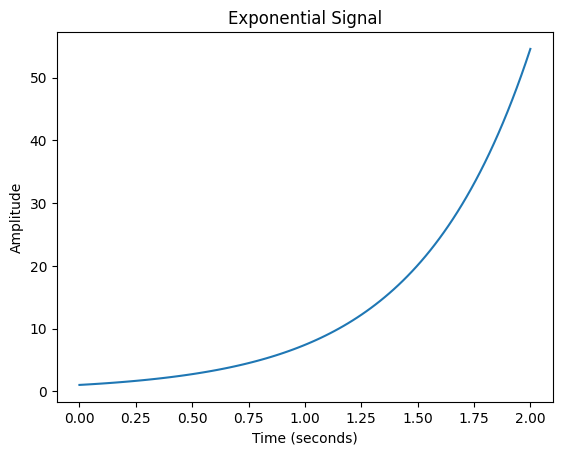

In [ ]:
# Example usage
a = 2
b = 100
c = 1
d = -2

exp_signal,exp_time = generate_exponential_signal(a, b, c, d)

plt.plot(exp_time, exp_signal)
plt.title('Exponential Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

2. Coba fungsi diatas, jelaskan apa variabel a, b, c, dan d dan tulis ulang nama variabel dari fungsi tersebut.

Setelah mengamati dan mencoba fungsi di atas, disimpulkan bahwa:

*   a = durasi sinyal dalam detik
*   b = jumlah titik data dalam sinyal (semakin besar nilainya, semakin halus grafiknya)
*   c = tinggi skala amplitudo sinyal
*   d = konstanta eksponensial yang menentukan pertumbuhan atau penurunan sinyal

Setiap variabel memiliki aturannya masing-masing.  Misalnya, jika b terlalu kecil, grafik akan terlihat patah-patah karena titik datanya sedikit. Jika d negatif, sinyal akan semakin besar seiring waktu (eksponensial naik). Sebaliknya, jika d positif, sinyal akan mengecil (eksponensial turun).



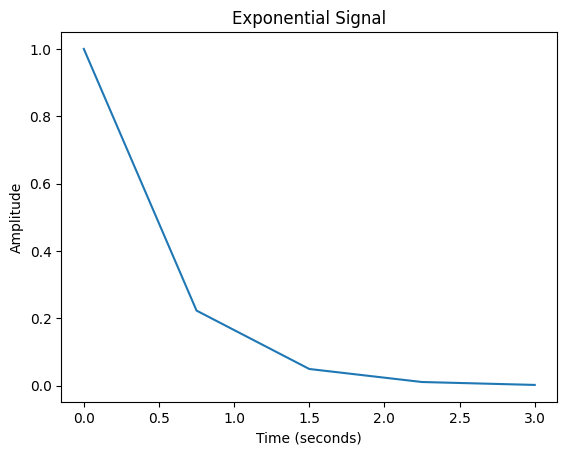

In [ ]:
# Example usage
a = 3
b = 5 #jika terlalu kecil akan patah-patah
c = 1
d = 2 #jika dipositifkan akan menurun garisnya

exp_signal,exp_time = generate_exponential_signal(a, b, c, d)

plt.plot(exp_time, exp_signal)
plt.title('Exponential Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

### Derau (Noise)

Diberikan 5 fungsi untuk generate noise sebagai berikut:
 - White noise
 - Gaussian noise
 - Uniform noise
 - Pink noise
 - Brown noise

In [ ]:
def generate_white_noise(duration, fs):
    samples = int(duration * fs)
    return np.random.normal(0, 1, samples)

def generate_gaussian_noise(duration, fs, mean=0, std=1):
    samples = int(duration * fs)
    return np.random.normal(mean, std, samples)

def generate_uniform_noise(duration, fs, low=-1, high=1):
    samples = int(duration * fs)
    return np.random.uniform(low, high, samples)

def generate_pink_noise(duration, fs):
    samples = int(duration * fs)
    uneven = samples % 2
    X = np.random.randn(samples // 2 + 1 + uneven) + 1j * np.random.randn(samples // 2 + 1 + uneven)
    S = np.sqrt(np.arange(len(X)) + 1.)
    y = (np.fft.irfft(X / S)).real
    if uneven:
        y = y[:-1]
    return y

def generate_brownian_noise(duration, fs):
    samples = int(duration * fs)
    return np.cumsum(np.random.randn(samples))


3. Dengan menggunakan fungsi diatas buat plot suatu sinyal pulsa dengan amplitudo 4 dan interval 3 detik yang diberi suatu noise uniform yang memiliki amplitudo maksimal 2 dan minimal 0

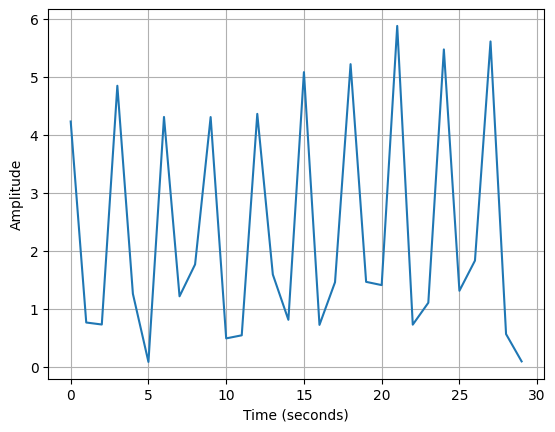

In [ ]:
#tulis program Anda disini
def generate_impulse_series(jumlah_impulse,interval_impulse,dur):
  signal = np.zeros(dur)
  for i in range(jumlah_impulse):
    signal[i * interval_impulse] = 4 #Mengisi nilai 4 pada posisi yang merupakan kelipatan interval_impulse
  return signal

jumlah_impulse = 10
interval_impulse = 3
dur = 30

noice = generate_uniform_noise(30,1,0,2)  #Membuat noise accak
impulse_series = generate_impulse_series(jumlah_impulse, interval_impulse, dur) #Membuat sinyal impulse
total = impulse_series+noice #Menjumlahkan sinyal impulse dengan noise

plt.plot(total)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Program ini dimulai dengan menggunakan fungsi **generate_impulse_series(jumlah_impulse, interval_impulse, dur)**, yang menghasilkan sinyal pulsa dengan amplitudo 4 pada titik-titik tertentu dalam rentang waktu yang diberikan.

*   Jumlah_impulse = 10  Artinya ada 10 pulsa.
*   interval_impulse = 3 detik  Pulsa muncul setiap 3 detik.
*   dur = 30 detik  Sinyal dibuat sepanjang 30 detik.

dan fungsi **generate_uniform_noise(30, 1, 0, 2)** untuk membuat noise acak. Noise kemudian ditambahkan ke deret impulse, dan hasilnya sinyal total ini  ditampilkan dalam grafik menggunakan **plt.plot(total)** sehingga saya bisa melihat bagaimana bentuk sinyal dengan gangguan noise tersebut.



---


© Prof. Hertog Nugroho, Teguh Ginanjar S.T., M.T, Muhammad Yusuf Fadhlan, SST., M.Sc & Nila Novitasari SST., MSc.

Politeknik Negeri Bandung (2025)